# Introdução à Agronomia com Python e dados (MC 5)

06/01/2021 - 22/01/2021. 

Segundas, Quartas e Sextas das 18:00 as 19:30

### Professor: Lucas Mielke.
### Contato: lucas.mielke@usp.br

### Módulo 2.3. Comercialização de Commodities

http://www.b3.com.br/pt_br/produtos-e-servicos/negociacao/commodities/

https://www.cmegroup.com/

https://cepea.esalq.usp.br/br


### Download de arquivos Excel, CSV, TXT... identificados no endereço - Usar pandas 

In [ ]:
import pandas as pd
pd.read_excel("http://www.anp.gov.br/images/Precos/Precos-produtores-importadores-derivados-petroleo/Precos_Medios_Ponderados_Semanais_a_partir_de_2013.xls", header=8)


### As vezes um capnho de download funciona. Ex. Google drive

In [2]:
import pandas as pd

url = 'https://drive.google.com/file/d/1ESGPYI9l3psfTWaEJQwQJvIIj-AgMPPv/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]

df = pd.read_csv(path,sep=",",decimal=".",encoding="latin1")

df.head(2)

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag,Note
0,4,Algeria,23045,Agriculture research spending,6083,"Share of Value Added (Agriculture, Forestry an...",2009,2009,%,0.18,X,ASTI (Agricultural Science and Technology Indi...
1,4,Algeria,23045,Agriculture research spending,6083,"Share of Value Added (Agriculture, Forestry an...",2010,2010,%,0.18,X,ASTI (Agricultural Science and Technology Indi...


### Download de arquivos e depois abrir (arquivos maiores, que exigem tratamento mais complexo, etc). 


Exemplo com arquivo do CEPEA - https://cepea.esalq.usp.br/br 

Toda vez o arquivo muda de nome, o formato também é um pouco incompatível (se eu tentar abrir o download, terei erro de arquivo corrompido) 

requests: https://requests.readthedocs.io/en/master/


dica de: https://www.codementor.io/@aviaryan/downloading-files-from-urls-in-python-77q3bs0un

Correção do erro de: https://stackoverflow.com/questions/12705527/reading-excel-files-with-xlrd

In [3]:
# VAMOS TER UMA MENSAGEM DE ERRO:

pd.read_excel('https://cepea.esalq.usp.br/br/indicador/series/acucar.aspx?id=143')

_locate_stream(Workbook): seen
    0  5 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 
   20  4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 
  260= 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 
  280  4 4 4 4 4 4 4 4 4 3 2 2 2 


CompDocError: Workbook corruption: seen[3] == 4

In [4]:
# TAMBÉM VAMOS TER UMA MENSAGEM DE ERRO:

pd.read_excel("CEPEA_20210118184455.xls")

_locate_stream(Workbook): seen
    0  5 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 
   20  4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 
  600= 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 
  620  4 4 4 4 4 4 4 4 4 4 4 3 2 2 2 2 2 


CompDocError: Workbook corruption: seen[3] == 4

In [5]:
#ALGUEM TEVE ESSE PROBLEMA E APRESENTOU UMA SOLUCAO

# https://stackoverflow.com/questions/12705527/reading-excel-files-with-xlrd

#pip install OleFileIO-PL
import OleFileIO_PL
import pandas as pd

path = 'CEPEA_20210118184455.xls'
with open(path,'rb') as file:
    ole = OleFileIO_PL.OleFileIO(file)
    if ole.exists('Workbook'):
        d = ole.openstream('Workbook')
        x=pd.read_excel(d,engine='xlrd')
        print(x.head())

  INDICADOR DO AÇÚCAR CRISTAL CEPEA/ESALQ - SÃO PAULO  Unnamed: 1   Unnamed: 2
0                                                NaN          NaN          NaN
1                                       Fonte: Cepea          NaN          NaN
2                                               Data   À vista R$  À vista US$
3                                         20/05/2003        29.65         9.75
4                                         21/05/2003        29.26         9.75


VAMOS BAIXAR O ARQUIVO POR PROGRAMA

In [6]:
import requests
import re

url = 'https://cepea.esalq.usp.br/br/indicador/series/acucar.aspx?id=143'
r = requests.get(url, allow_redirects=True)

In [7]:
def get_filename_from_cd(cd):
    """
    Get filename from content-disposition
    """
    if not cd:
        return None
    fname = re.findall('filename=(.+)', cd)
    if len(fname) == 0:
        return None
    return fname[0]

In [8]:
filename = get_filename_from_cd(r.headers.get('content-disposition'))
filename

'CEPEA_20210120191729.xls;'

In [9]:
# A PARTIR DESSE MOMENTO, O ARQUIVO TÁ NA PASTA
open(filename, 'wb').write(r.content)

150528

In [12]:
#pip install OleFileIO-PL
import OleFileIO_PL
import pandas as pd


path = filename
with open(path,'rb') as file:
    ole = OleFileIO_PL.OleFileIO(file)
    if ole.exists('Workbook'):
        d = ole.openstream('Workbook')
        excel=pd.read_excel(d,engine='xlrd',header=3)

excel.head()

,Data,À vista R$,À vista US$
0,23/01/2013,44.90,22.02
1,24/01/2013,44.57,21.91
2,25/01/2013,44.66,22.02
3,28/01/2013,44.68,22.07
4,29/01/2013,44.56,22.38


In [13]:
excel.tail()

,Data,À vista R$,À vista US$
1973,14/01/2021,101.48,19.29
1974,15/01/2021,101.91,19.33
1975,18/01/2021,101.45,19.22
1976,19/01/2021,103.21,19.49
1977,20/01/2021,102.46,19.32


In [14]:
excel.shape

(1978, 3)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = excel["Data"]
y_rs = excel["À vista R$"]
y_us = excel["À vista US$"]

plt.plot(x,y_rs, label="acucar em real")
plt.plot(x,y_us, label="acucar em dolar")
plt.legend()

In [15]:
#Rápida estatistica descritiva

excel.describe()

,À vista R$,À vista US$
count,1978.000000,1978.000000
mean,64.832791,19.417958
std,15.338748,3.749687
min,43.950000,12.640000
25%,51.710000,16.262500
50%,62.285000,19.165000
75%,76.560000,21.767500
max,109.240000,31.680000


https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.hist.html

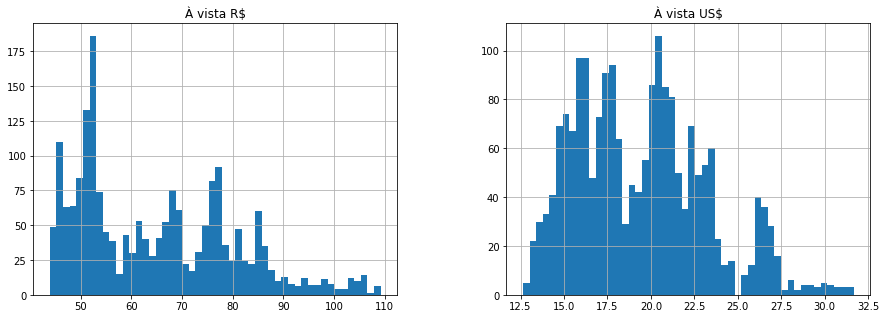

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
excel.hist(bins=50, figsize=(15,5))
plt.show()

Alguém tira alguma conclusão do gráfico acima??

#### Boa prática - colocar em array

In [ ]:
# O codigo acima é exatemente o mesmo do de baixo, mas aqui colocamos em array

excel=excel.tail(100)

import numpy as np
import matplotlib.pyplot as plt

x = np.array(excel["Data"])
y_rs = np.array(excel["À vista R$"])
y_us = np.array(excel["À vista US$"])

plt.plot(x,y_rs, label="acucar em real")
plt.plot(x,y_us, label="acucar em dolar")
plt.legend()

## Sobre o Quandl

https://www.quandl.com/

https://www.quandl.com/tools/python

In [18]:
import quandl
quandl.get("CEPEA/SUGAR_C", authtoken="gC1jqxmRVSBh_LAzwxDL")

,Price US$,Daily %,Monthly %
Date,,,
2013-01-23,22.02,NaN,NaN
2013-01-24,21.91,NaN,NaN
2013-01-25,22.02,NaN,NaN
2013-01-28,22.07,NaN,NaN
2013-01-29,22.38,NaN,NaN
...,...,...,...
2021-01-13,19.05,1.22,-6.07
2021-01-14,19.29,1.26,-4.88
2021-01-15,19.33,0.21,-4.68


### Sobre Pip Install

https://jakevdp.github.io/blog/2017/12/05/installing-python-packages-from-jupyter/

https://blog.vertigo.com.br/o-que-e-api-entenda-de-uma-maneira-simples/

A sigla API corresponde às palavras em inglês “Application Programming Interface“. No português “Interface de Programação de Aplicações”. Elas são uma forma de integrar sistemas, possibilitando benefícios como a segurança dos dados, facilidade no intercâmbio entre informações com diferentes linguagens de programação e a monetização de acessos. 

In [ ]:
!pip install quandl

In [1]:
import quandl
dados = quandl.get("CEPEA/SUGAR_C")
dados = dados.reset_index()
dados.tail()

,Date,Price US$,Daily %,Monthly %
1970,2021-01-11,18.73,-3.05,-7.64
1971,2021-01-12,18.82,0.48,-7.20
1972,2021-01-13,19.05,1.22,-6.07
1973,2021-01-14,19.29,1.26,-4.88
1974,2021-01-15,19.33,0.21,-4.68


In [2]:
excel.tail()

NameError: name 'excel' is not defined

https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/

### Médulo 2.3. - Exportações

Exportação de produtos agrícolas: http://comexstat.mdic.gov.br/pt/geral/26104

Exportação total: http://comexstat.mdic.gov.br/pt/geral/26106

China: http://comexstat.mdic.gov.br/pt/geral/26107

Importações: http://comexstat.mdic.gov.br/pt/geral/26108

In [25]:
import pandas as pd
exp = pd.read_excel("COMEX\Total2020.xlsx")
china = pd.read_excel("COMEX\China2020.xlsx")
agr = pd.read_excel("COMEX\Vegetal2020.xlsx")
imp = pd.read_excel("COMEX\Imp2020.xlsx")

AGREGAÇÕES: https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html

In [11]:
#Exportações 2020
print("Use .sum() para soma =",(exp["2020 - Valor FOB (US$)"].sum())/10**6)
print("Use .max() para máximo =",(exp["2020 - Valor FOB (US$)"].max())/10**6)
print("Use .min() para mínimo =",(exp["2020 - Valor FOB (US$)"].min())/10**6)
print("Use .média() para média =",(exp["2020 - Valor FOB (US$)"].mean())/10**6)
print("Use .média() para contar =",(exp["2020 - Valor FOB (US$)"].count()))

Use .sum() para soma = 209817.415387
Use .max() para máximo = 67686.223961
Use .min() para mínimo = 3e-05
Use .média() para média = 859.9074401106558
Use .média() para contar = 244


### Quanto a agricultura representa das exportações? Quem é nosso principal cliente?

In [12]:
#Total de Exportações 2020
(exp["2020 - Valor FOB (US$)"].sum())/10**6

209817.415387

In [13]:
#Total de Exportações agrícolas 2020
(agr["2020 - Valor FOB (US$)"].sum())/10**6

45029.313492

In [14]:
#Quanto representa do total
agr["2020 - Valor FOB (US$)"].sum()/exp["2020 - Valor FOB (US$)"].sum()

0.2146118967719872

In [15]:
#Quanto china representa do total 
china = exp[exp["Países"]=="China"]

#Quanto representa do total
china["2020 - Valor FOB (US$)"].sum()/exp["2020 - Valor FOB (US$)"].sum()

0.3225958333161021

In [16]:
#Quanto china representa do total 
agr_china = agr[agr["Países"]=="China"]

#Quanto representa do total
agr_china["2020 - Valor FOB (US$)"].sum()/exp["2020 - Valor FOB (US$)"].sum()

0.10467437606402222

**Conclusões:**

Em 2020 o Brasil exportou 209 bilhões. A Agricultura exportou 45 bi - 21% do Total.

A China é o principal cliente do Brasil - Exportamos 67 bi para esse país, 22bi em produtos agrícolas.

A Exportação para a China é 32% do total. A Exportação agrícola para a China representa 10% de todas as exportações Brasileiras.

In [18]:
#Quanto EUA representa do total 
eua = exp[exp["Países"]=="Estados Unidos"]
print(eua["2020 - Valor FOB (US$)"].sum()/10**6)
#Quanto representa do total
print(eua["2020 - Valor FOB (US$)"].sum()/exp["2020 - Valor FOB (US$)"].sum())

21458.840494
0.10227387681055936


EUA é nosso segundo cliente, entretanto A China é 3x maior que os EUA em exportações. 

In [26]:
#Merge de exportacao e Agricultura
paises = exp.merge(agr,  how='inner', on="Países", suffixes=('_Exportacao', '_Agricola'))

#Merge do anterior com Importações
paises = paises.merge(imp,  how='inner', on="Países")

#sort pelo total exportado
paises.sort_values(by=['2020 - Valor FOB (US$)_Exportacao'], ascending=False, inplace=True)

# apagar colunas inuteis
paises = paises.drop(['Código ISIC Divisão', 'Descrição ISIC Divisão'], axis=1)

# renomear (nao dá certo fazer o suffixes pq nao tem mais nome igual)
paises = paises.rename(columns={"2020 - Valor FOB (US$)": "2020 - Valor FOB (US$)_Importacao", "2020 - Quilograma Líquido": "2020 - Quilograma Líquido_Importacao"})

# Exibir DF (lembrando que formalmente eu teria de usar o Print(), mas como é jupyter, dá para dispensar)
paises.head(5)     

,Países,2020 - Valor FOB (US$)_Exportacao,2020 - Quilograma Líquido_Exportacao,2020 - Valor FOB (US$)_Agricola,2020 - Quilograma Líquido_Agricola,2020 - Valor FOB (US$)_Importacao,2020 - Quilograma Líquido_Importacao
0,China,67686223961,376465389507,21962507043,61313778393,34041634708,11103559455
1,Estados Unidos,21458840494,27781654137,1190920768,583232202,24122469498,36510589789
2,Argentina,8474734717,6252906128,258800721,534127184,7787832116,9841195602
3,Países Baixos (Holanda),7397545961,20575669469,1595150631,4077298057,1339332556,1837062870
4,Canadá,4235605707,7829350589,133739300,68244307,1805933919,4477334477


In [27]:
# Dividir por bilão - Vamos fazer uma função
def dividir(coluna,divisor=10**9):
    try: 
        paises[coluna] = paises[coluna]/divisor
    except: 
        return None 

In [28]:
#vamos aplica a funcao em todas as colunas
for coluna in paises.columns:
    dividir(coluna)

In [29]:
paises

,Países,2020 - Valor FOB (US$)_Exportacao,2020 - Quilograma Líquido_Exportacao,2020 - Valor FOB (US$)_Agricola,2020 - Quilograma Líquido_Agricola,2020 - Valor FOB (US$)_Importacao,2020 - Quilograma Líquido_Importacao
0,China,67.686224,376.465390,2.196251e+01,6.131378e+01,3.404163e+01,1.110356e+01
1,Estados Unidos,21.458840,27.781654,1.190921e+00,5.832322e-01,2.412247e+01,3.651059e+01
2,Argentina,8.474735,6.252906,2.588007e-01,5.341272e-01,7.787832e+00,9.841196e+00
3,Países Baixos (Holanda),7.397546,20.575669,1.595151e+00,4.077298e+00,1.339333e+00,1.837063e+00
4,Canadá,4.235606,7.829351,1.337393e-01,6.824431e-02,1.805934e+00,4.477334e+00
...,...,...,...,...,...,...,...
164,Niue,0.000096,0.000206,3.140000e-07,4.000000e-07,8.300000e-08,0.000000e+00
165,Coreia do Norte,0.000093,0.000079,7.540000e-07,6.100000e-07,1.601800e-05,2.890000e-07
166,Mônaco,0.000074,0.000019,4.575000e-06,4.114000e-06,4.876880e-03,2.913900e-05
167,Falkland (Malvinas),0.000014,0.000011,3.105000e-06,1.134000e-06,1.792400e-05,1.022000e-06


Vamos ver a balança comercial e razão agrícola desses países.

In [30]:
paises["Balanca_comercial"] = paises["2020 - Valor FOB (US$)_Exportacao"] - paises["2020 - Valor FOB (US$)_Importacao"]
paises["razao_agr_%"] = paises["2020 - Valor FOB (US$)_Agricola"]/paises["2020 - Valor FOB (US$)_Exportacao"]*100
paises.head(5)

,Países,2020 - Valor FOB (US$)_Exportacao,2020 - Quilograma Líquido_Exportacao,2020 - Valor FOB (US$)_Agricola,2020 - Quilograma Líquido_Agricola,2020 - Valor FOB (US$)_Importacao,2020 - Quilograma Líquido_Importacao,Balanca_comercial,razao_agr_%
0,China,67.686224,376.465390,21.962507,61.313778,34.041635,11.103559,33.644589,32.447529
1,Estados Unidos,21.458840,27.781654,1.190921,0.583232,24.122469,36.510590,-2.663629,5.549791
2,Argentina,8.474735,6.252906,0.258801,0.534127,7.787832,9.841196,0.686903,3.053791
3,Países Baixos (Holanda),7.397546,20.575669,1.595151,4.077298,1.339333,1.837063,6.058213,21.563241
4,Canadá,4.235606,7.829351,0.133739,0.068244,1.805934,4.477334,2.429672,3.157501


In [31]:
paises["Balanca_comercial"].sum()

62.80038765299999

In [32]:
paises.sort_values(by=['Balanca_comercial'], ascending=False, inplace=True)
paises.head(10)

,Países,2020 - Valor FOB (US$)_Exportacao,2020 - Quilograma Líquido_Exportacao,2020 - Valor FOB (US$)_Agricola,2020 - Quilograma Líquido_Agricola,2020 - Valor FOB (US$)_Importacao,2020 - Quilograma Líquido_Importacao,Balanca_comercial,razao_agr_%
0,China,67.686224,376.465390,21.962507,61.313778,34.041635,11.103559,33.644589,32.447529
3,Países Baixos (Holanda),7.397546,20.575669,1.595151,4.077298,1.339333,1.837063,6.058213,21.563241
11,Cingapura,3.649406,11.016315,0.004292,0.002283,0.799535,0.328793,2.849871,0.117603
4,Canadá,4.235606,7.829351,0.133739,0.068244,1.805934,4.477334,2.429672,3.157501
15,Turquia,2.766990,9.906698,1.375362,2.860909,0.556067,1.103320,2.210923,49.706096
12,Malásia,3.210363,27.965965,0.389770,1.450183,1.101687,0.295041,2.108676,12.141009
18,Hong Kong,2.327265,1.277509,0.004349,0.001982,0.590037,0.104720,1.737228,0.186866
28,Egito,1.757145,6.361296,0.622149,3.247947,0.212174,0.796808,1.544970,35.406834
7,Espanha,4.057009,12.515710,1.560510,5.417025,2.532463,3.441998,1.524546,38.464553
32,Bangladesh,1.526667,4.500035,0.700867,1.775883,0.127769,0.017365,1.398899,45.908270


**Conclusões**
* 32% do que exportamos para a China é Mercadoria agrícola. 
* China é responsável por metade da balança comercial brasileira
* Nosso segundo cliente (EUA) é deficiário em 2 bilhões.
**Do ponto de vista comercial, a China é de longe o pais mais importante para o Brasil**, seguido de Holanda, Canada, Turquia. Egito também está no top 10 de balança comercial


In [34]:
china["2020 - Valor FOB (US$)"] = china["2020 - Valor FOB (US$)"]/10**6

In [35]:
china

,Países,Código CUCI Item,Descrição CUCI Item,2020 - Valor FOB (US$),2020 - Quilograma Líquido
0,China,2222,Soja,20905.254130,60601378878
1,China,2815,"Minério de ferro e seus concentrados, não aglo...",17940.410837,241944482529
2,China,3330,"Óleos de petróleo ou de minerais betuminosos, ...",11296.795030,40984183112
3,China,1122,"Carne de gado bovino congelada, desossada",4037.370307,868667444
4,China,25152,"Pastas químicas de madeira, ao bissulfito, exc...",2603.092932,7343692636
...,...,...,...,...,...
1436,China,84848,"Faixas, forros, capas, armações, moldes, picos...",0.000000,20
1437,China,52383,Silicatos; silicatos dos metais alcalinos come...,0.000000,1
1438,China,67917,"Outros tubos sem costura, tubos e perfis ocos",0.000000,0
1439,China,77241,Fusíveis,0.000000,0


In [ ]:
paises["Balanca_comercial_%"] = paises["Balanca_comercial"]/paises["2020 - Valor FOB (US$)_Exportacao"]

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["2020 - Valor FOB (US$)_Exportacao","2020 - Valor FOB (US$)_Agricola","2020 - Valor FOB (US$)_Importacao","Balanca_comercial","razao_agr_%"]
scatter_matrix(paises[attributes], figsize=(12, 8))